<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/Cab_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [466]:
#import dependencies
%matplotlib inline
import os

#start python imports
import math, time, random, datetime

#data manupilation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize

#Machine Learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')



In [467]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test.csv  test_label.csv  train.csv  train_label.csv


In [468]:
data= os.listdir('../content/drive/My Drive/Dataset')
data

['train_label.csv', 'test_label.csv', 'test.csv', 'train.csv']

In [469]:
# Import train dataset
cb_train= pd.read_csv('../content/drive/My Drive/Dataset/train.csv')
cb_train


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012
...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979


In [470]:
# Import test dataset
cb_test= pd.read_csv('../content/drive/My Drive/Dataset/test.csv')
cb_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [471]:
cb_train_label= pd.read_csv('../content/drive/My Drive/Dataset/train_label.csv')
cb_train_label

,504
0,5
1,139
2,209
3,184
4,791
...,...
8702,13
8703,11
8704,1
8705,92


In [472]:
# Import train_label dataset and name the column
cb_train_label= pd.read_csv('../content/drive/My Drive/Dataset/train_label.csv',header=None)
new_col_list=['Total_booking']
cb_train_label_rename = cb_train_label.set_axis(new_col_list, axis='columns', inplace=False)
cb_train_label_rename

,Total_booking
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


In [473]:
#append the data 
data_append=pd.concat([cb_train, cb_train_label_rename], axis=1, ignore_index=False)
data_append

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [474]:
data_append['datetime'] = pd.to_datetime(data_append['datetime'])

data_append['date'] = data_append['datetime'].dt.date

data_append['time'] = data_append['datetime'].dt.time

data_append

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19:00:00
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,04:00:00
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,09:00:00
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16:00:00
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-01-16 06:00:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,2012-01-16,06:00:00
8704,2011-11-10 01:00:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,2011-11-10,01:00:00
8705,2011-04-12 03:00:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,2011-04-12,03:00:00
8706,2012-11-07 01:00:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,2012-11-07,01:00:00


In [475]:
data_append.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       8708 non-null   datetime64[ns]
 1   season         8708 non-null   object        
 2   holiday        8708 non-null   int64         
 3   workingday     8708 non-null   int64         
 4   weather        8708 non-null   object        
 5   temp           8708 non-null   float64       
 6   atemp          8708 non-null   float64       
 7   humidity       8708 non-null   int64         
 8   windspeed      8708 non-null   float64       
 9   Total_booking  8708 non-null   int64         
 10  date           8708 non-null   object        
 11  time           8708 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 816.5+ KB


In [476]:
#check data types
data_append.dtypes

datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                     object
time                     object
dtype: object

In [477]:
#count data types
data_append.dtypes.value_counts()

object            4
int64             4
float64           3
datetime64[ns]    1
dtype: int64

In [478]:
#get count mean, median, mode and standard deviation
data_append.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [479]:
#finding any columns with missing values 
null_columns=data_append.columns[data_append.isnull().any()]
data_append[null_columns].isnull().sum()

Series([], dtype: float64)

In [480]:
#correlation between Total_booking with other features
corr=data_append.corr()["Total_booking"]
corr[np.argsort(corr, axis=0)[::-1]]

Total_booking    1.000000
temp             0.397456
atemp            0.392754
windspeed        0.092090
workingday       0.012285
holiday         -0.004391
humidity        -0.307982
Name: Total_booking, dtype: float64

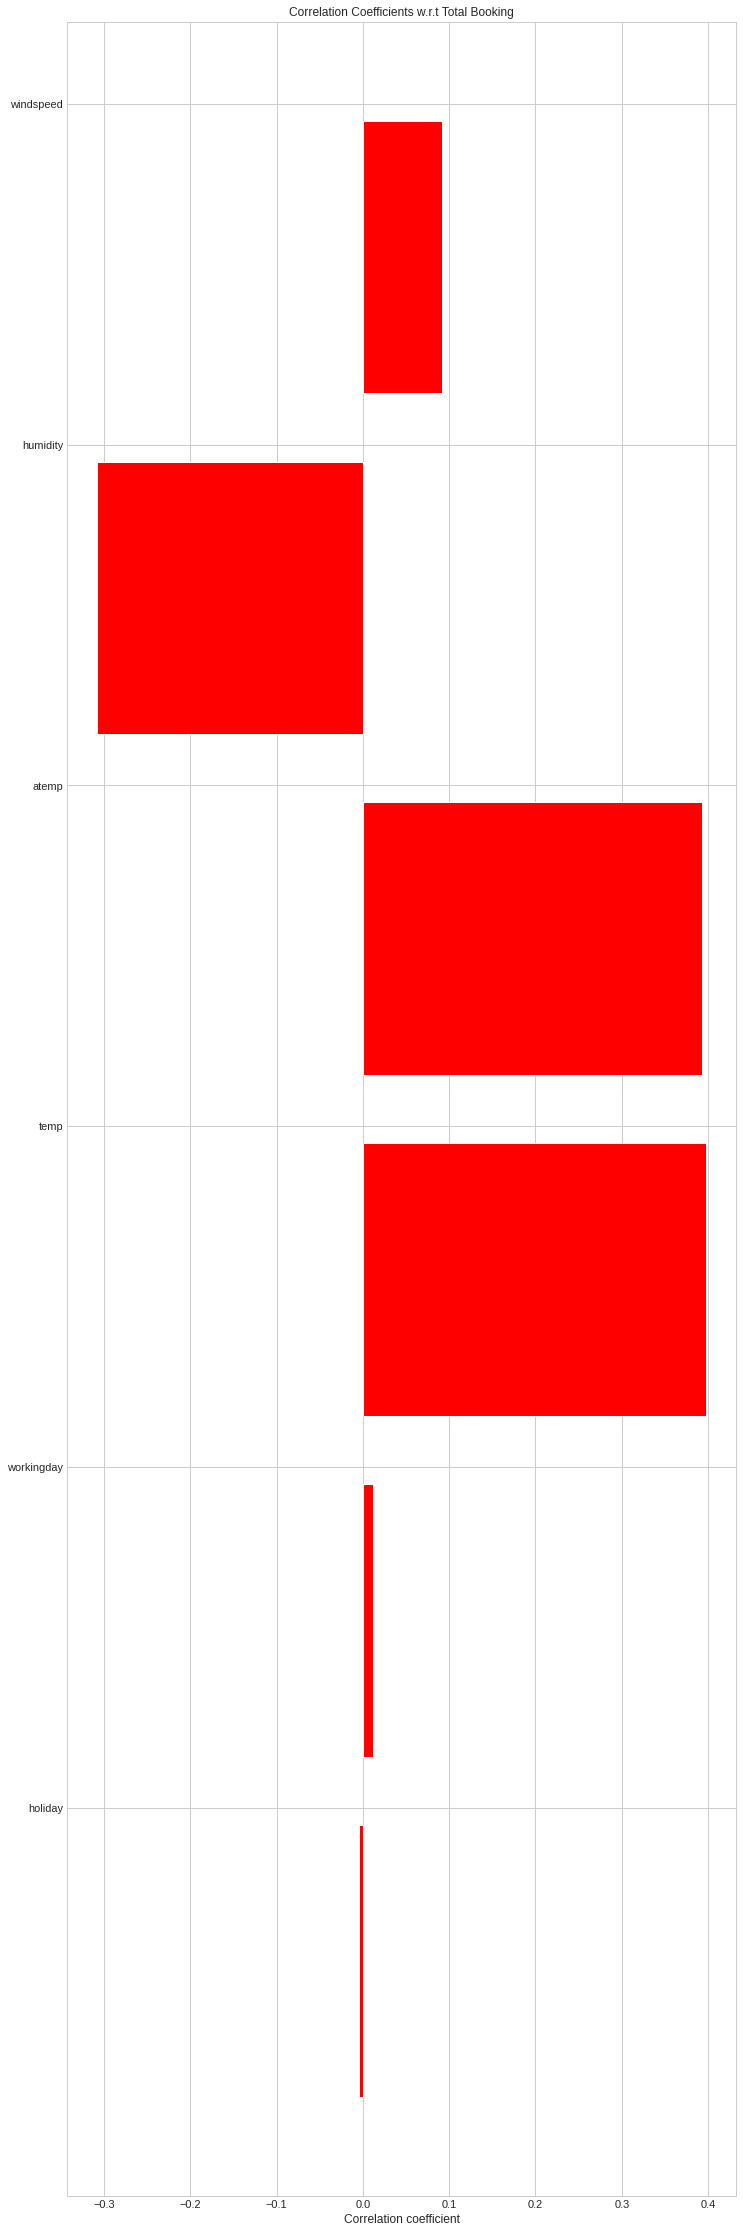

In [481]:
#plotting correlations
num_feat=data_append.columns[data_append.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(data_append[col].values, data_append.Total_booking.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Total Booking");

In [482]:
#multicollinearity in regression 


correlations=data_append.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(
      key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])


unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
0,"(atemp, temp)",0.984035


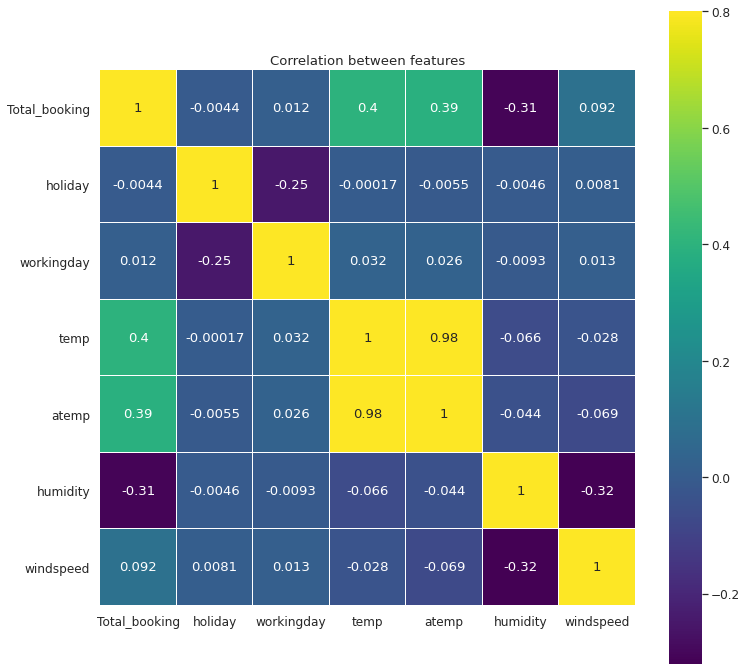

In [483]:
#heatmap showing multicollinearity

'"Need to create single features befor it can be used in model predictors, yellow blocks shows correlation"'


corrMatrix=data_append[["Total_booking", "holiday","workingday","temp",
                  "atemp","humidity","windspeed"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(12, 12))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [484]:
#pivotal features
data_append[['date','Total_booking']].groupby(['date'],
as_index=False).mean().sort_values(by='date', ascending=False)

,date,Total_booking
455,2012-12-19,232.454545
454,2012-12-18,247.238095
453,2012-12-17,224.941176
452,2012-12-16,155.761905
451,2012-12-15,201.388889
...,...,...
4,2011-01-05,68.300000
3,2011-01-04,70.894737
2,2011-01-03,59.800000
1,2011-01-02,40.764706


In [485]:
data_append[['time','Total_booking']].groupby(['time'],
as_index=False).mean().sort_values(by='time', ascending=False)

,time,Total_booking
23,23:00:00,89.292225
22,22:00:00,137.354571
21,21:00:00,174.534626
20,20:00:00,232.181564
19,19:00:00,314.095109
18,18:00:00,428.382514
17,17:00:00,474.742466
16,16:00:00,315.207547
15,15:00:00,257.245283
14,14:00:00,243.546742


In [486]:
data_append[['holiday','Total_booking']].groupby(['holiday'],
as_index=False).mean().sort_values(by='holiday', ascending=False)

,holiday,Total_booking
1,1,188.350806
0,0,193.143499


In [487]:
data_append[['workingday','Total_booking']].groupby(['workingday'],
as_index=False).mean().sort_values(by='workingday', ascending=False)

,workingday,Total_booking
1,1,194.535955
0,0,189.753592


In [488]:
data_append[['temp','Total_booking']].groupby(['temp'],
as_index=False).mean().sort_values(by='temp', ascending=False)

,temp,Total_booking
48,41.00,294.000000
47,39.36,317.833333
46,38.54,217.500000
45,37.72,352.038462
44,36.90,327.769231
43,36.08,332.500000
42,35.26,326.400000
41,34.44,351.047619
40,33.62,353.786408
39,32.80,364.994083


In [489]:
data_append[['atemp','Total_booking']].groupby(['atemp'],
as_index=False).mean().sort_values(by='atemp', ascending=False)

,atemp,Total_booking
59,45.455,312.000000
58,44.695,376.000000
57,43.940,214.500000
56,43.180,307.142857
55,42.425,308.739130
54,41.665,291.500000
53,40.910,328.741935
52,40.150,407.633333
51,39.395,317.608696
50,38.635,341.158730


In [490]:
data_append[['humidity','Total_booking']].groupby(['humidity'],
as_index=False).mean().sort_values(by='humidity', ascending=False)

,humidity,Total_booking
87,100,66.710280
86,96,71.000000
85,94,94.657258
84,93,78.145570
83,92,76.000000
...,...,...
4,13,17.000000
3,12,29.000000
2,10,107.000000
1,8,77.000000


In [491]:
data_append[['windspeed','Total_booking']].groupby(['windspeed'],
as_index=False).mean().sort_values(by='windspeed', ascending=False)

,windspeed,Total_booking
27,56.9969,358.000000
26,51.9987,5.000000
25,50.0021,171.000000
24,47.9988,140.500000
23,46.0022,67.333333
22,43.9989,209.428571
21,43.0006,92.833333
20,40.9973,150.600000
19,39.0007,168.409091
18,36.9974,211.578947


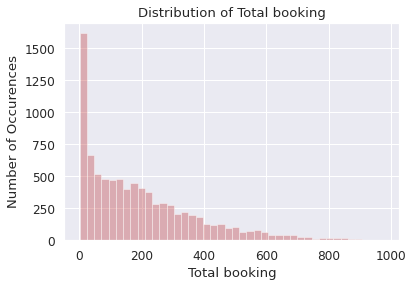

In [492]:
#visualizing target variables(univariate analysis)
sns.distplot(data_append['Total_booking'], color="r", kde=False)
plt.title("Distribution of Total booking")
plt.ylabel("Number of Occurences")
plt.xlabel("Total booking");

In [493]:
#skewness  

data_append['Total_booking'].skew()

1.2379281606952324

In [494]:
#kurtosis

data_append['Total_booking'].kurt()

1.3117222889080962

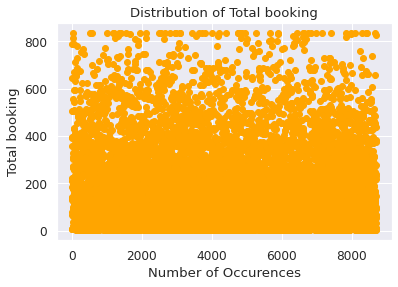

In [495]:
#need to remove some outliers.
upperlimit = np.percentile(data_append.Total_booking.values, 99.5)
data_append['Total_booking'].iloc[data_append['Total_booking']>upperlimit] = upperlimit

plt.scatter(range(data_append.shape[0]), data_append["Total_booking"].values,color='orange')
plt.title("Distribution of Total booking")
plt.xlabel("Number of Occurences")
plt.ylabel("Total booking");

In [496]:
#lets see if there are any columns with missing values 
null_columns=data_append.columns[data_append.isnull().any()]
data_append[null_columns].isnull().sum()

Series([], dtype: float64)

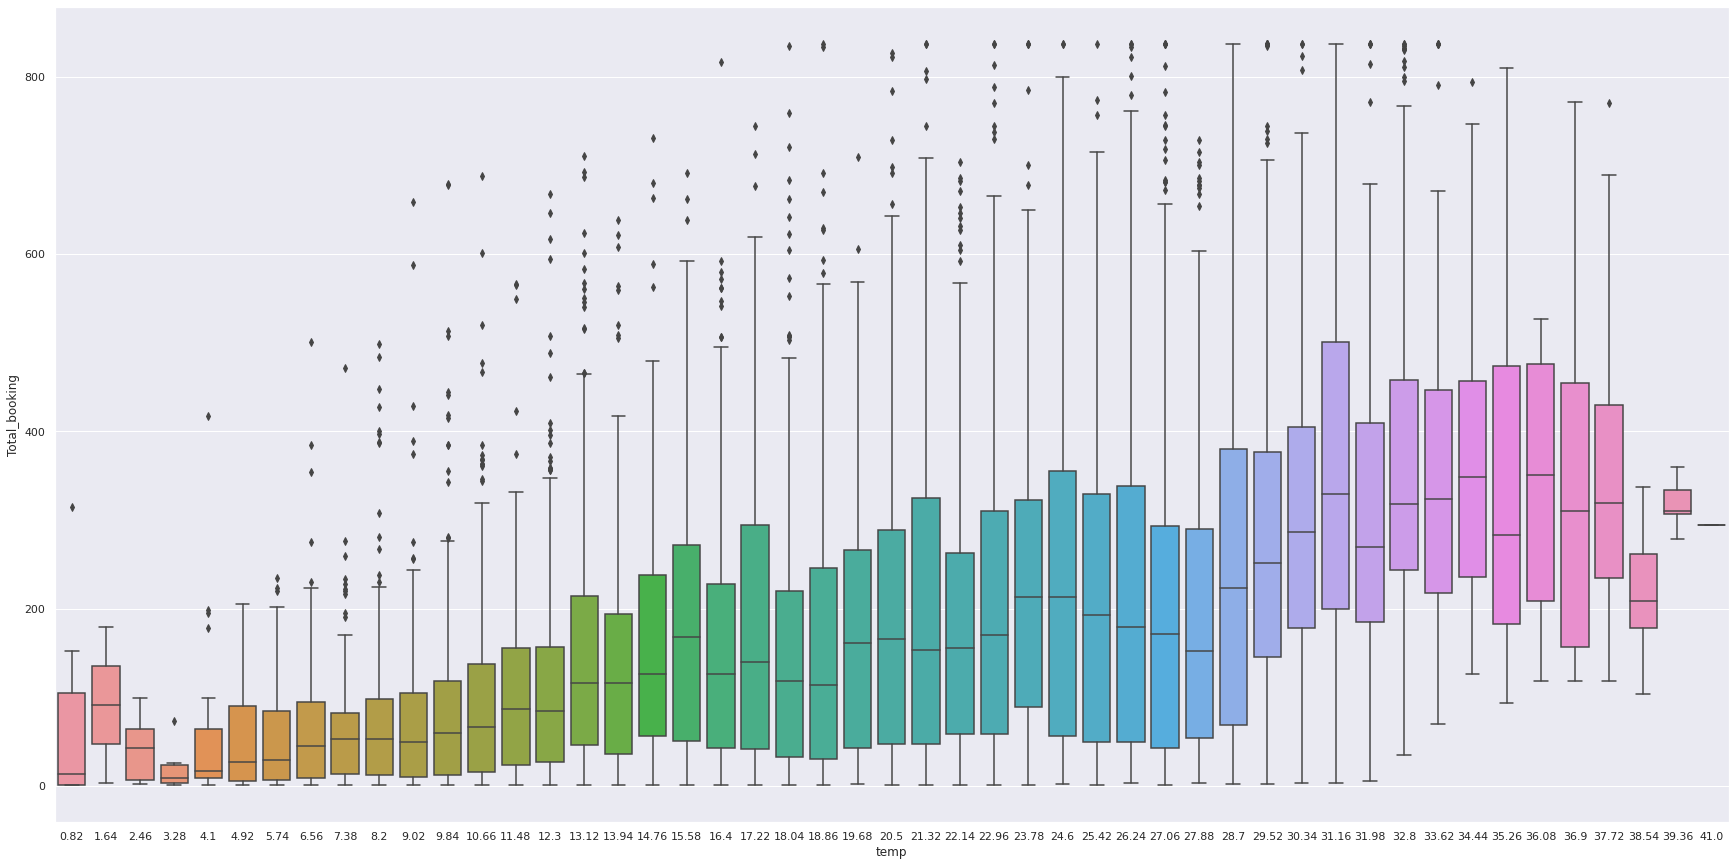

In [497]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot("temp","Total_booking",data=data_append);

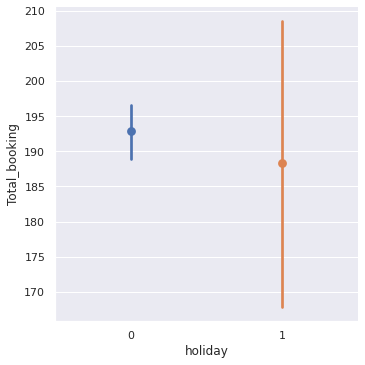

In [498]:
sns.factorplot("holiday","Total_booking",data=data_append,hue="holiday");

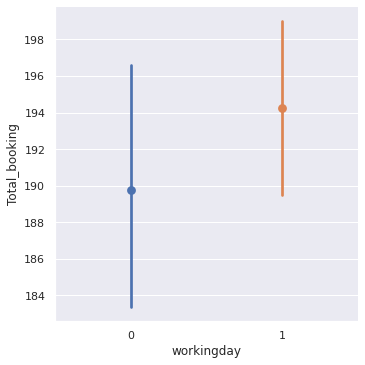

In [499]:
sns.factorplot("workingday","Total_booking",data=data_append,hue="workingday");

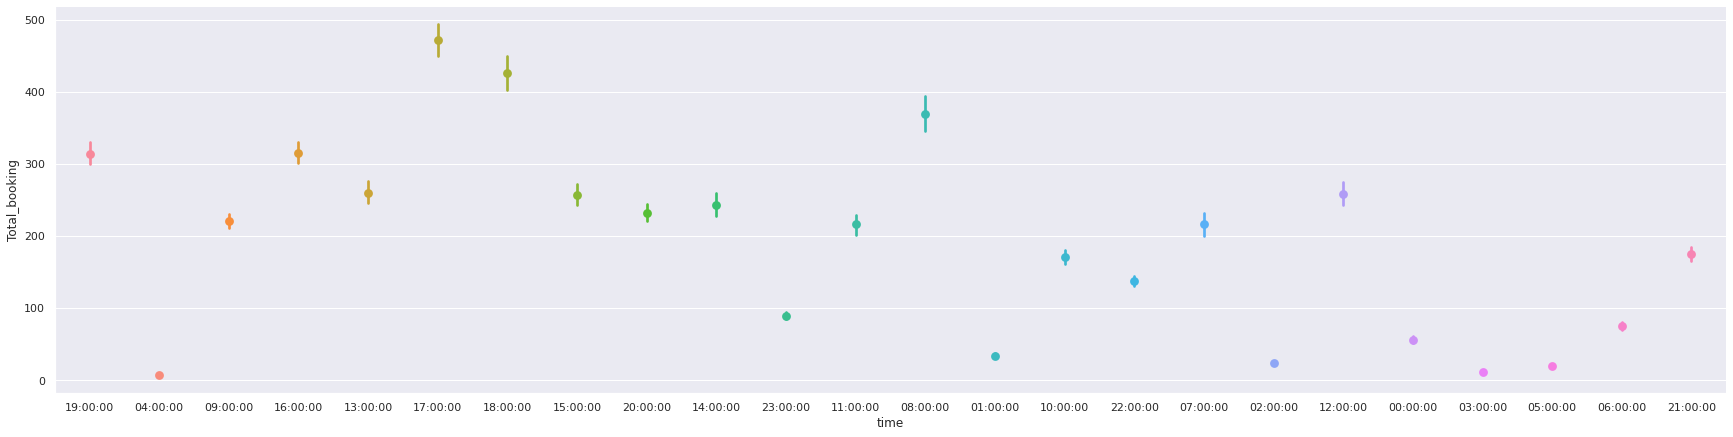

In [500]:
sns.factorplot("time","Total_booking",data=data_append,hue="time", size=6, aspect=4);

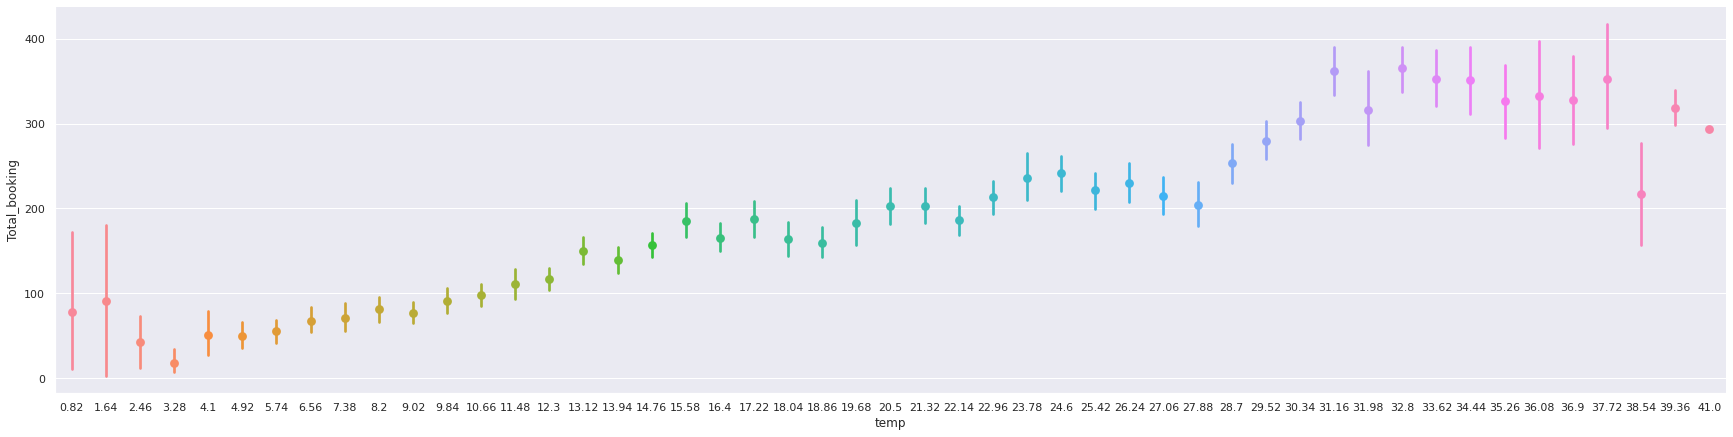

In [501]:
sns.factorplot("temp","Total_booking",data=data_append,hue="temp", size=6, aspect=4);

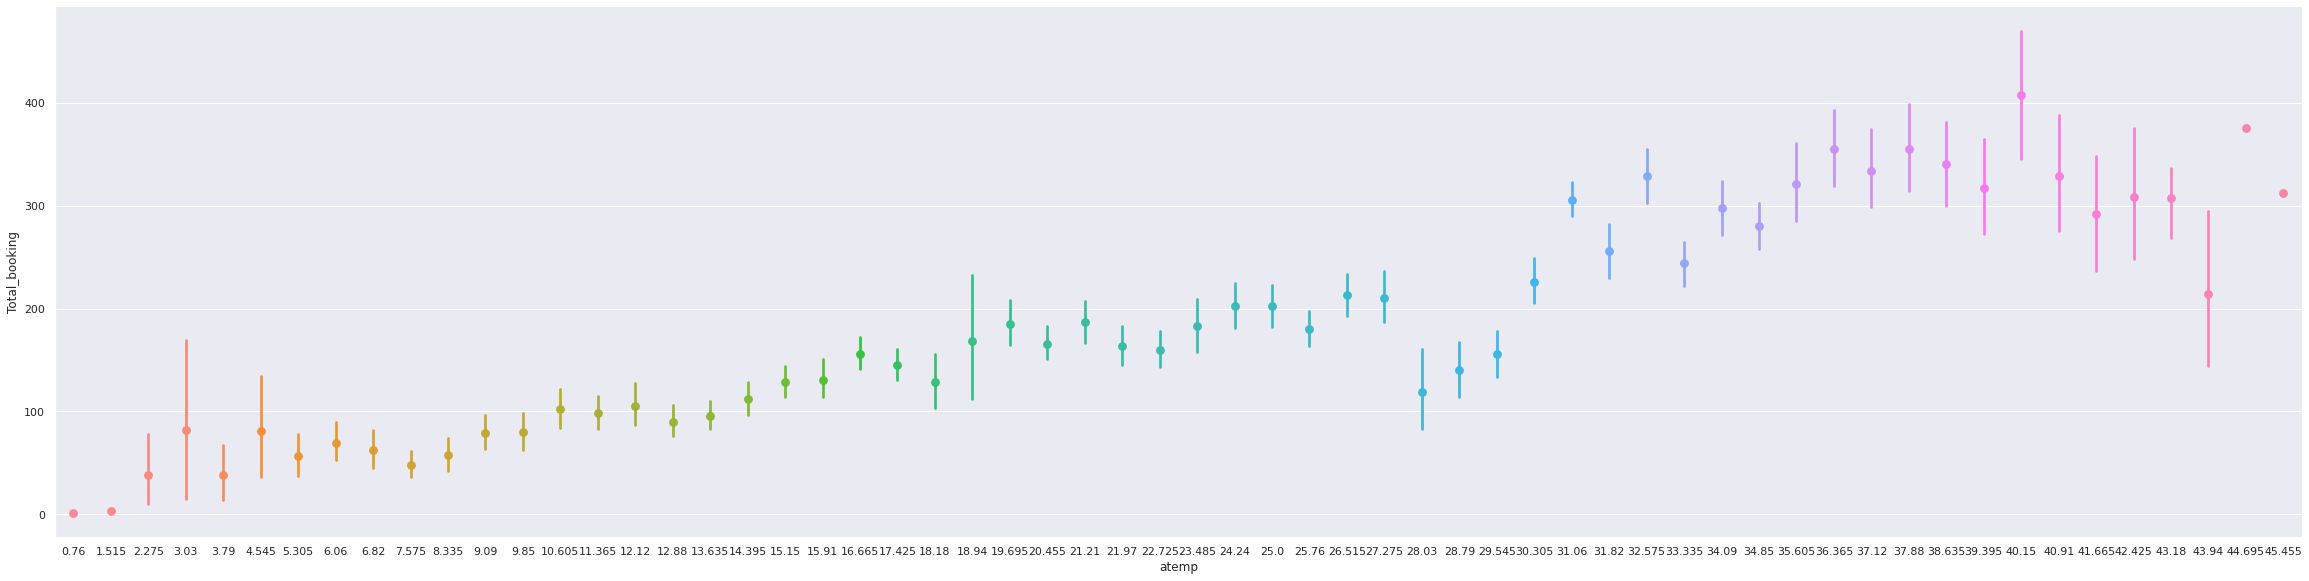

In [502]:
sns.factorplot("atemp","Total_booking",data=data_append,hue="atemp", size=8, aspect=4);

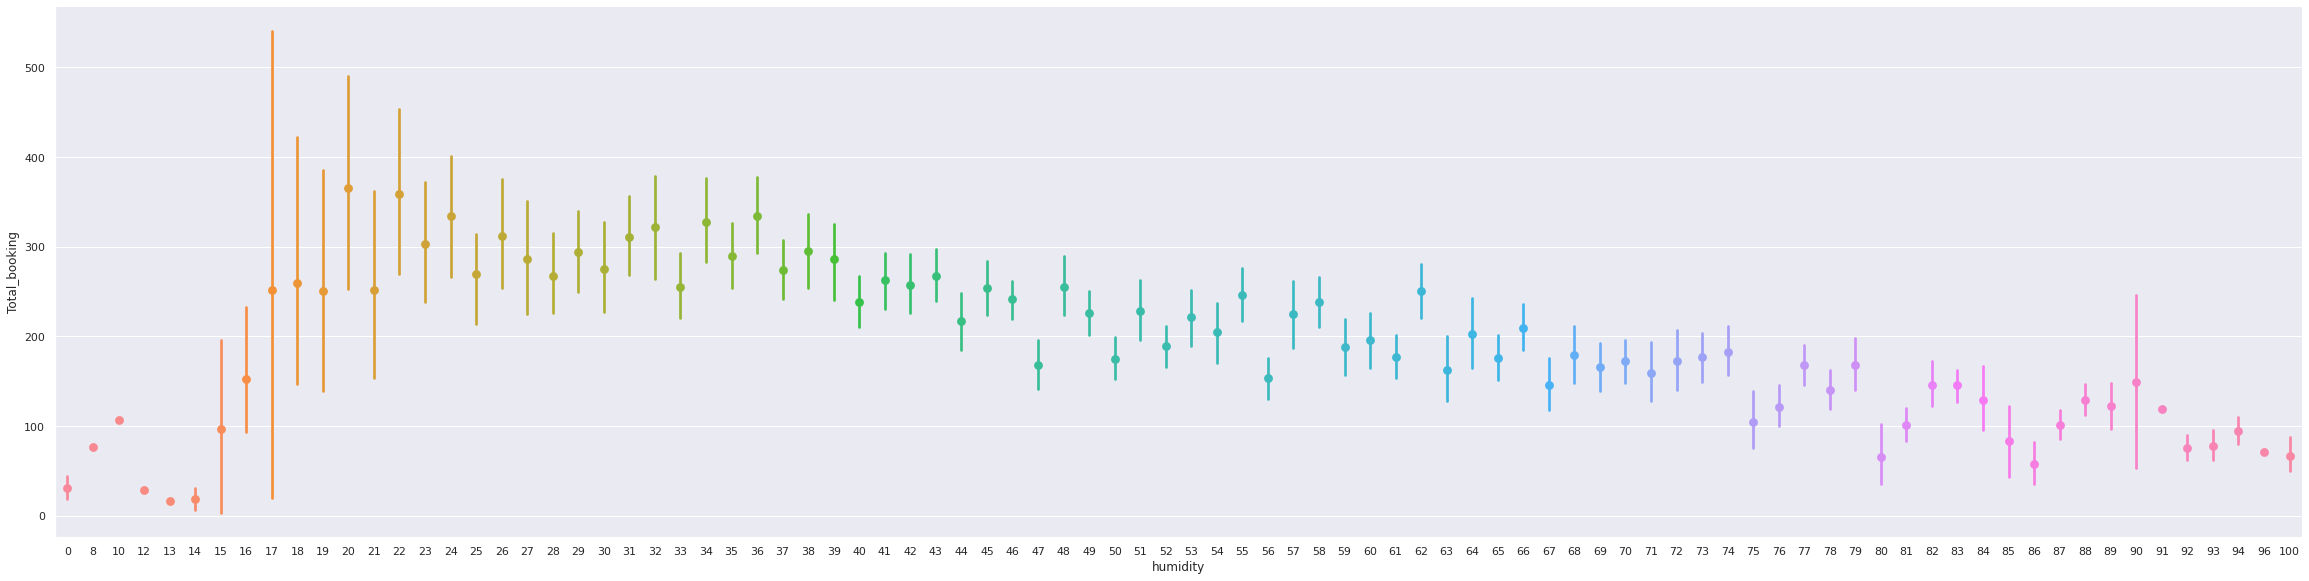

In [503]:
sns.factorplot("humidity","Total_booking",data=data_append,hue="humidity", size=8, aspect=4);

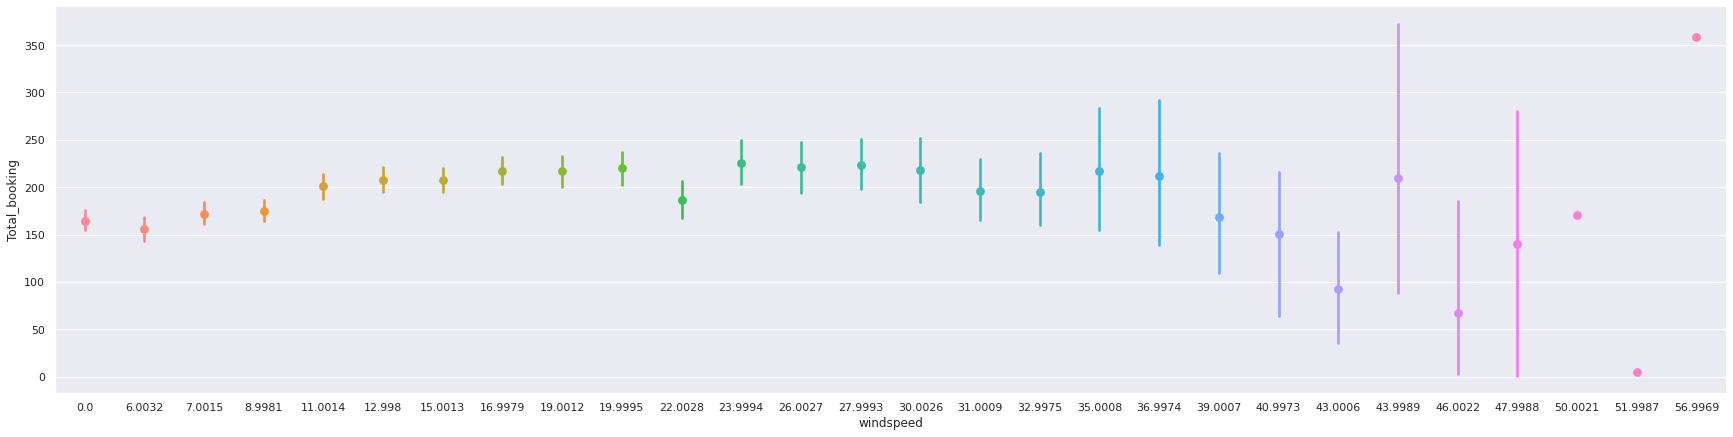

In [504]:
sns.factorplot("windspeed","Total_booking",data=data_append,hue="windspeed", size=6, aspect=4);

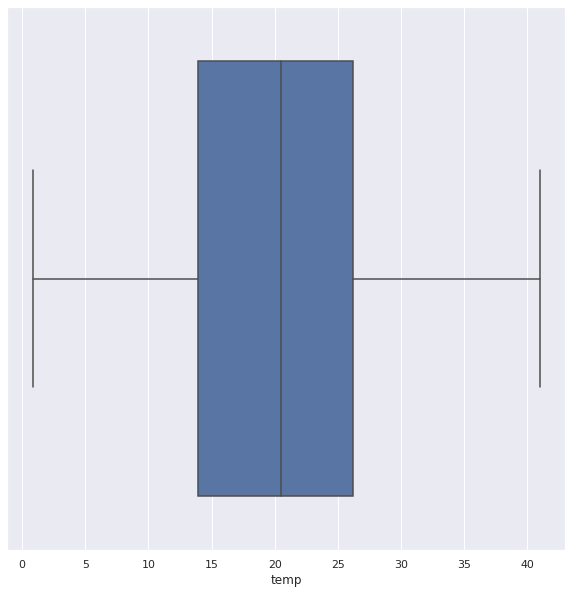

In [505]:
#boxplot for temp
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot("temp",data=data_append);

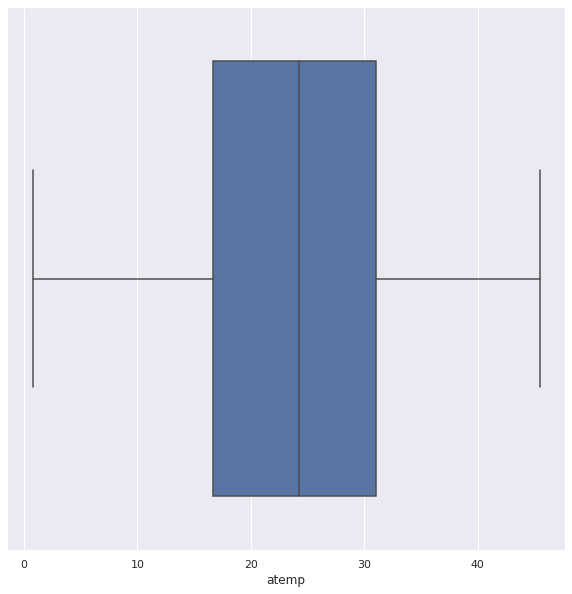

In [506]:
#boxplot for atemp
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot("atemp",data=data_append);

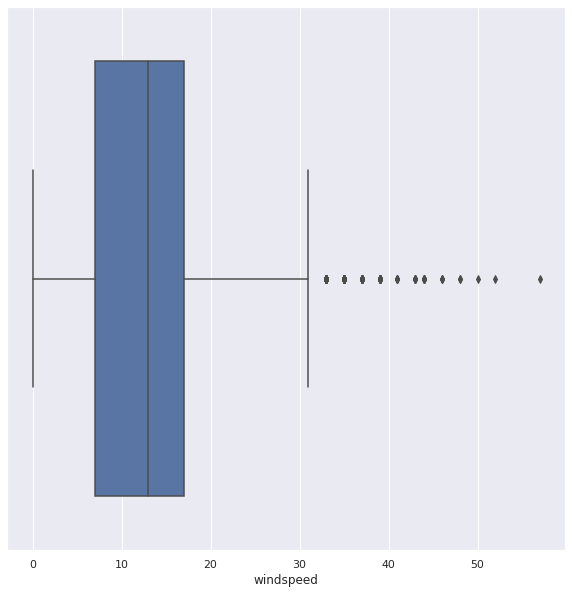

In [507]:
#boxplot for windspeed
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot("windspeed",data=data_append);

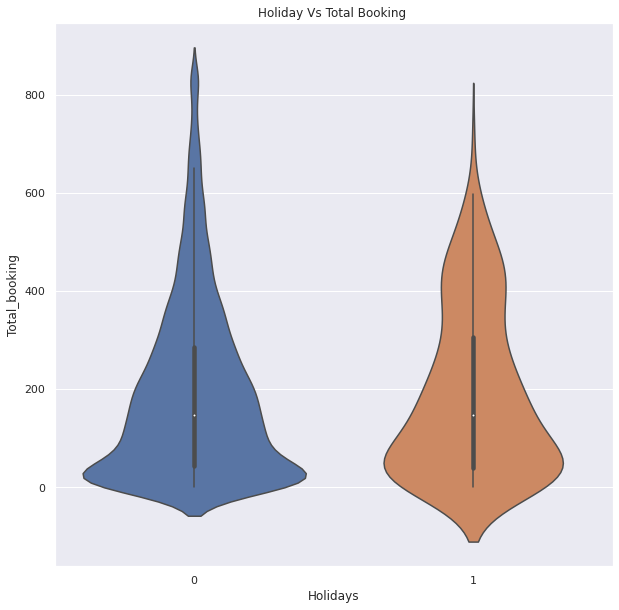

In [508]:
sns.violinplot(data_append["holiday"],data_append["Total_booking"])
plt.title("Holiday Vs Total Booking ")
plt.ylabel("Total_booking")
plt.xlabel("Holidays");

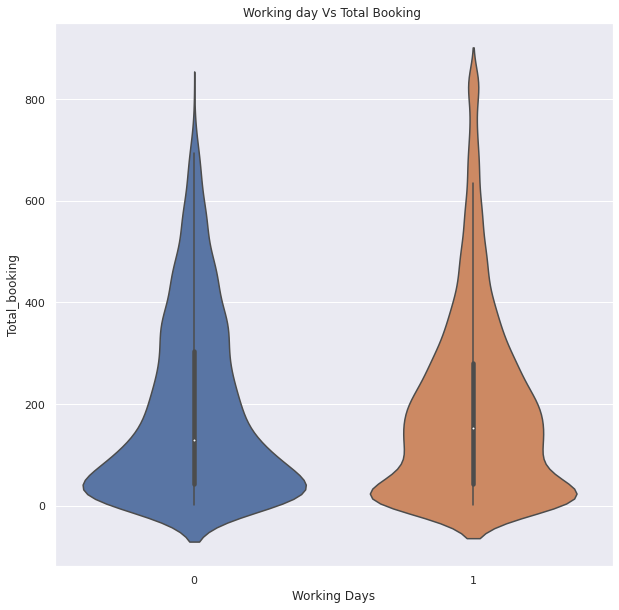

In [509]:
sns.violinplot(data_append["workingday"],data_append["Total_booking"])
plt.title("Working day Vs Total Booking ")
plt.ylabel("Total_booking")
plt.xlabel("Working Days");

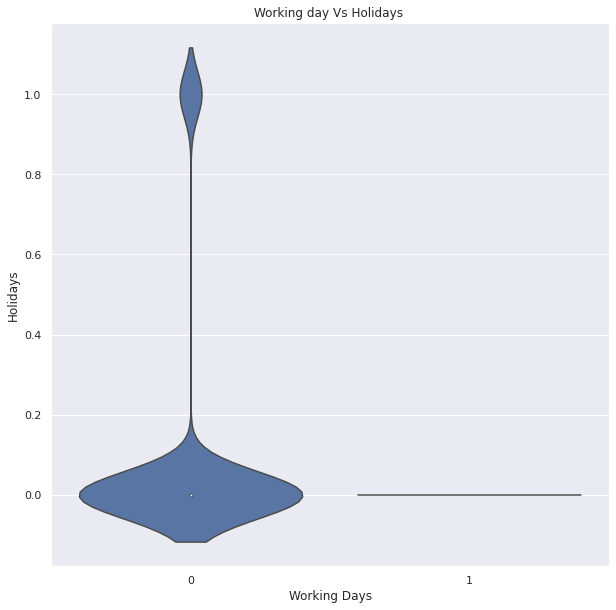

In [510]:
sns.violinplot(data_append["workingday"],data_append["holiday"])
plt.title("Working day Vs Holidays ")
plt.ylabel("Holidays")
plt.xlabel("Working Days");

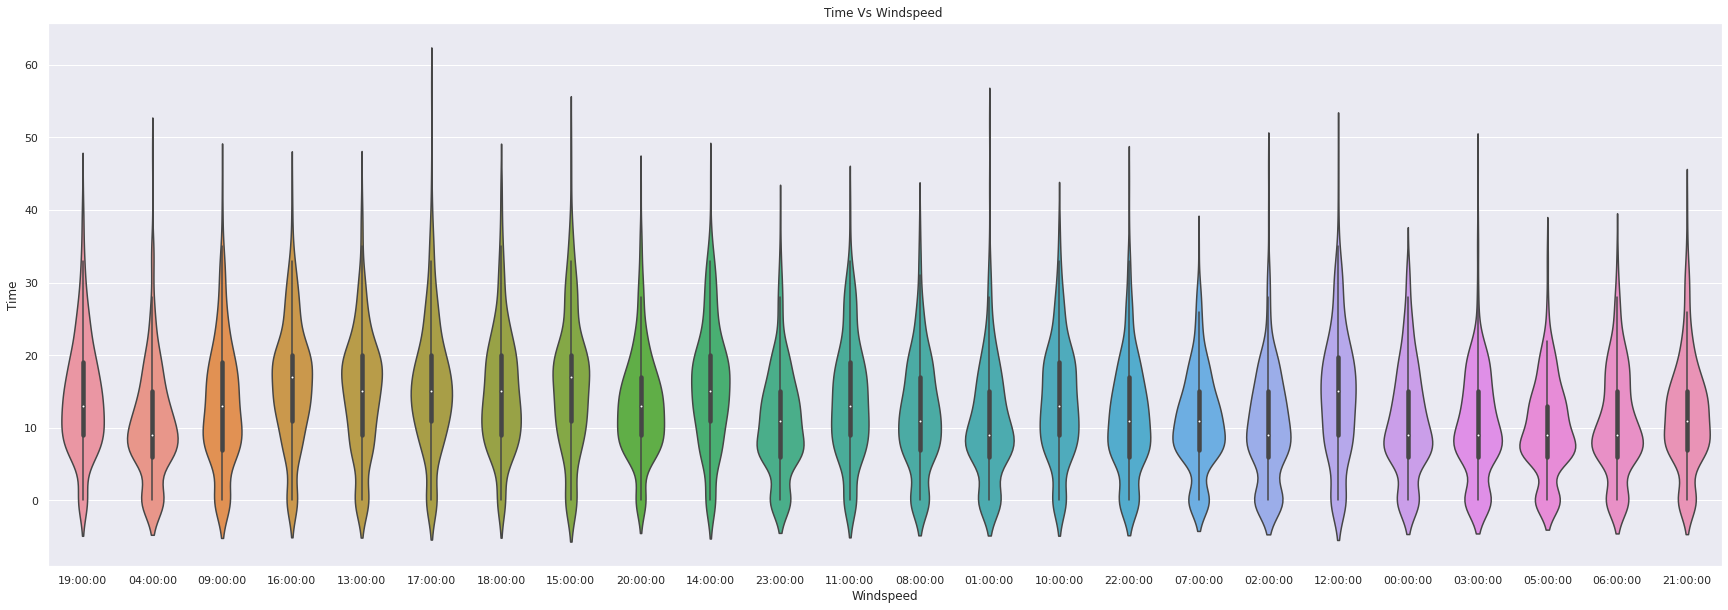

In [511]:
sns.set(rc={'figure.figsize':(30,10)})
sns.violinplot(data_append["time"],data_append["windspeed"])
plt.title("Time Vs Windspeed ")
plt.ylabel("Time")
plt.xlabel("Windspeed");

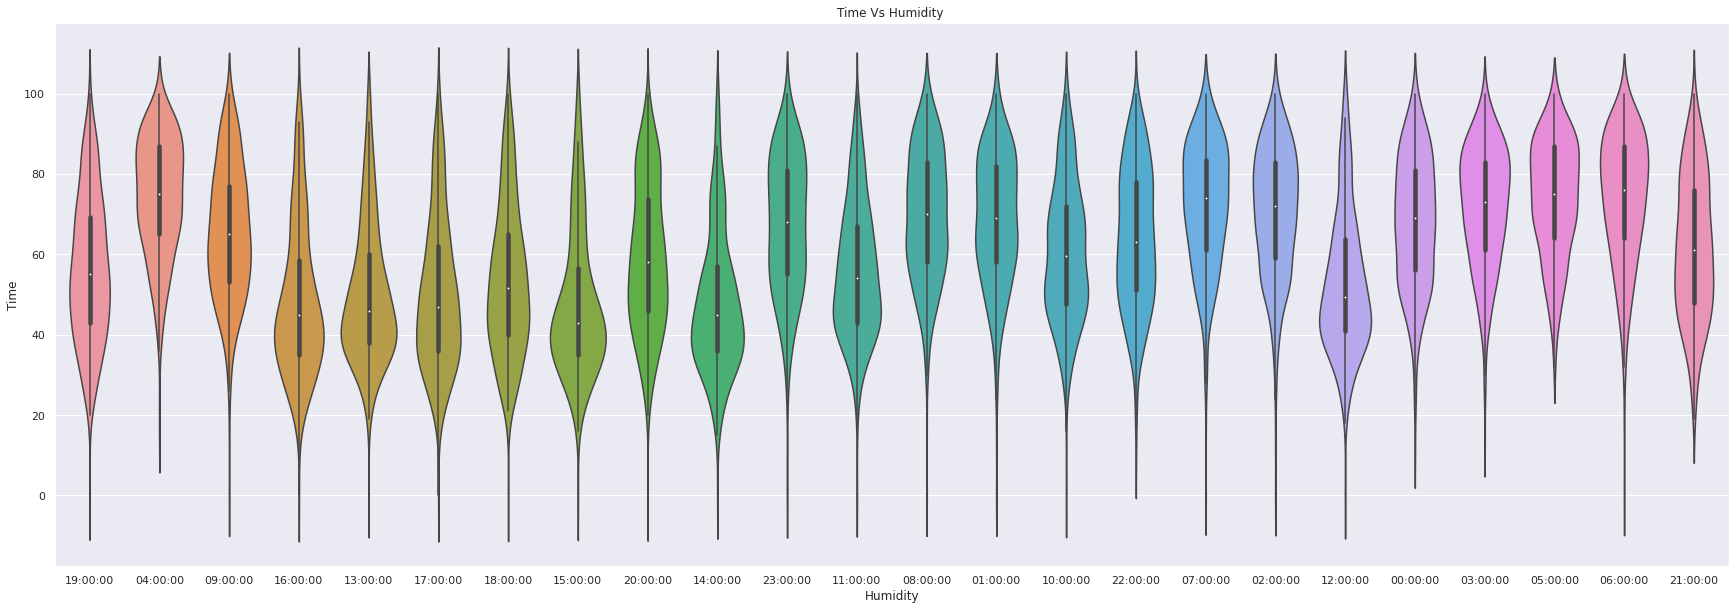

In [512]:
sns.set(rc={'figure.figsize':(30,10)})
sns.violinplot(data_append["time"],data_append["humidity"])
plt.title("Time Vs Humidity ")
plt.ylabel("Time")
plt.xlabel("Humidity");

In [513]:
#looking at test data 

cb_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994
...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981


In [514]:
#looking at test_label and naming Total_booking

cb_test_label= pd.read_csv('../content/drive/My Drive/Dataset/test_label.csv')
new_col_list_test=['Total_booking']
cb_test_label_rename = cb_test_label.set_axis(new_col_list_test, axis='columns', inplace=False)
cb_test_label_rename

,Total_booking
0,87
1,11
2,84
3,668
4,53
...,...
2172,3
2173,144
2174,159
2175,29


In [515]:
#append the data for test
data_append_test=pd.concat([cb_test, cb_test_label_rename], axis=1, ignore_index=False)
data_append_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,87.0
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.0
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.0
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,668.0
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.0
...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.0
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.0
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.0
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.0


In [516]:
#seperate date time column


data_append_test['datetime'] = pd.to_datetime(data_append_test['datetime'])

data_append_test['date'] = data_append_test['datetime'].dt.date

data_append_test['time'] = data_append_test['datetime'].dt.time

data_append_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,87.0,2012-05-10,11:00:00
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.0,2012-06-09,07:00:00
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.0,2011-03-06,20:00:00
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,668.0,2011-10-13,11:00:00
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.0,2012-06-02,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2012-03-08 03:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.0,2012-03-08,03:00:00
2174,2012-01-12 12:00:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.0,2012-01-12,12:00:00
2175,2012-03-07 22:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.0,2012-03-07,22:00:00
2176,2011-05-12 05:00:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.0,2011-05-12,05:00:00


In [517]:
#checking null values

data_append_test.isnull().sum()


datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    1
date             0
time             0
dtype: int64

In [518]:
#null values found in total bookings replacing with random values
'"replacing na values with random"'

data_append_test["Total_booking"].fillna( method ='ffill', inplace = True) 
data_append_test.isnull().sum()


datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
time             0
dtype: int64

In [519]:
#for train data

data_append.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
time             0
dtype: int64

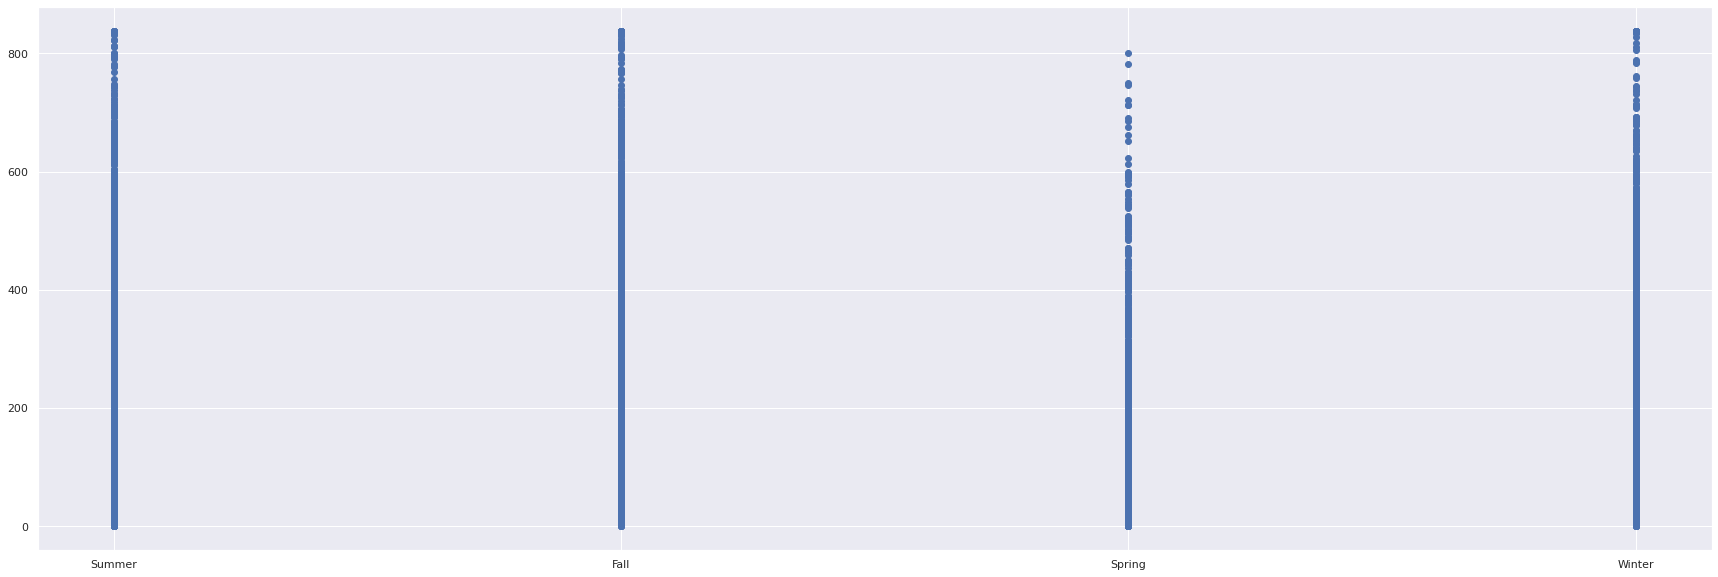

In [520]:
#plotting columns of season

plt.scatter(data_append['season'],data_append['Total_booking'])
plt.show()

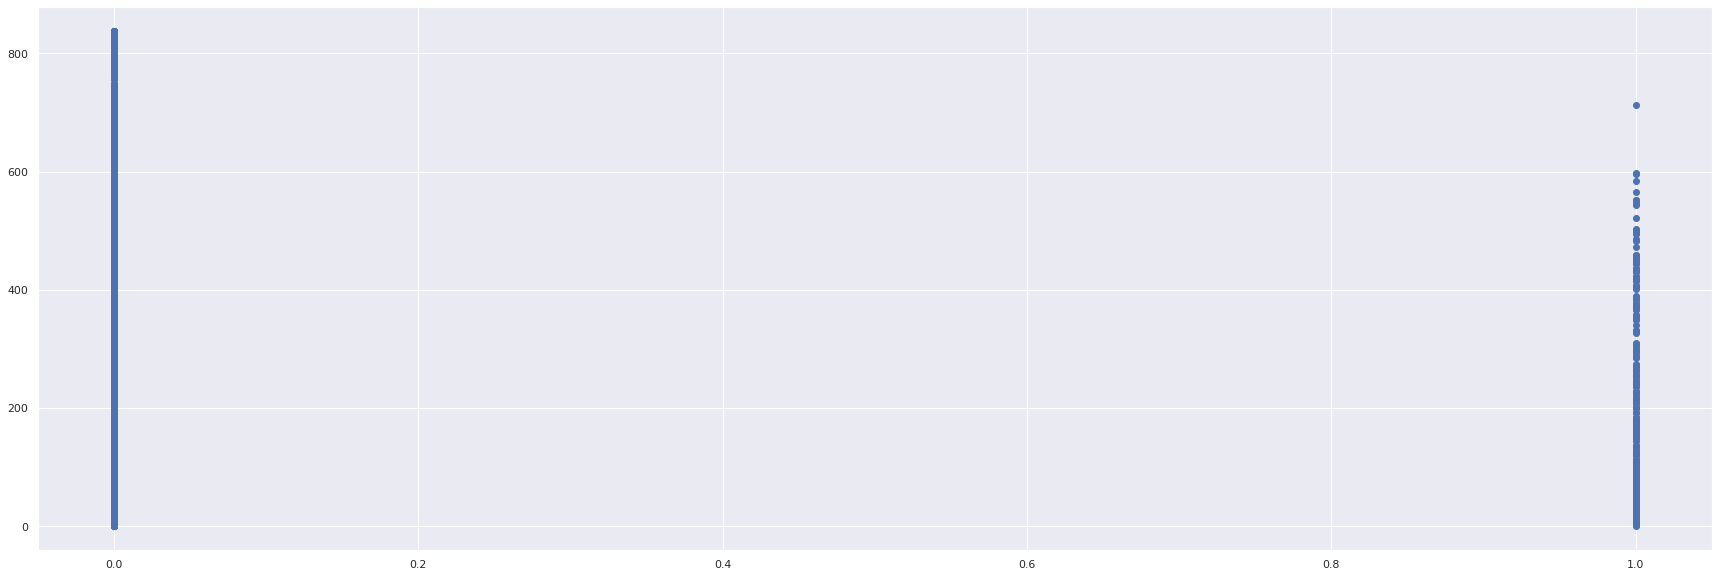

In [521]:
plt.scatter(data_append['holiday'],data_append['Total_booking'])
plt.show()

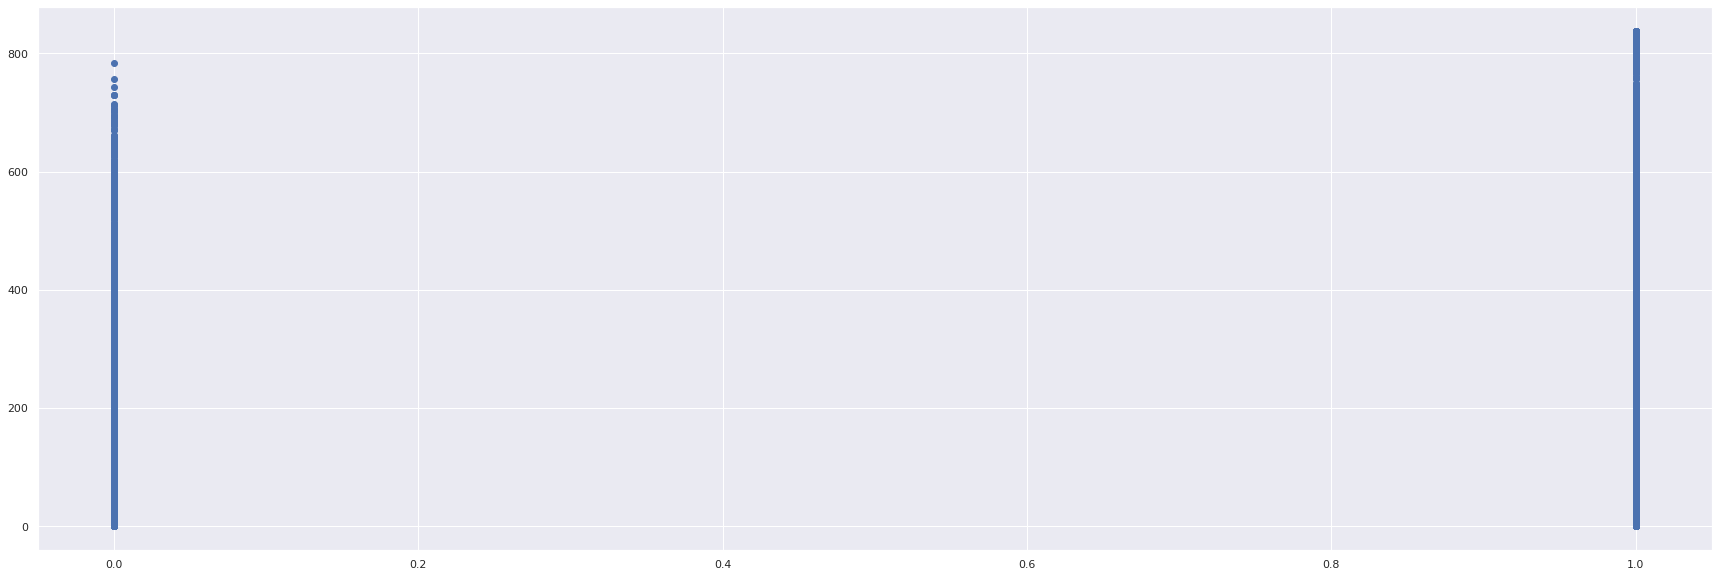

In [522]:
plt.scatter(data_append['workingday'],data_append['Total_booking'])
plt.show()

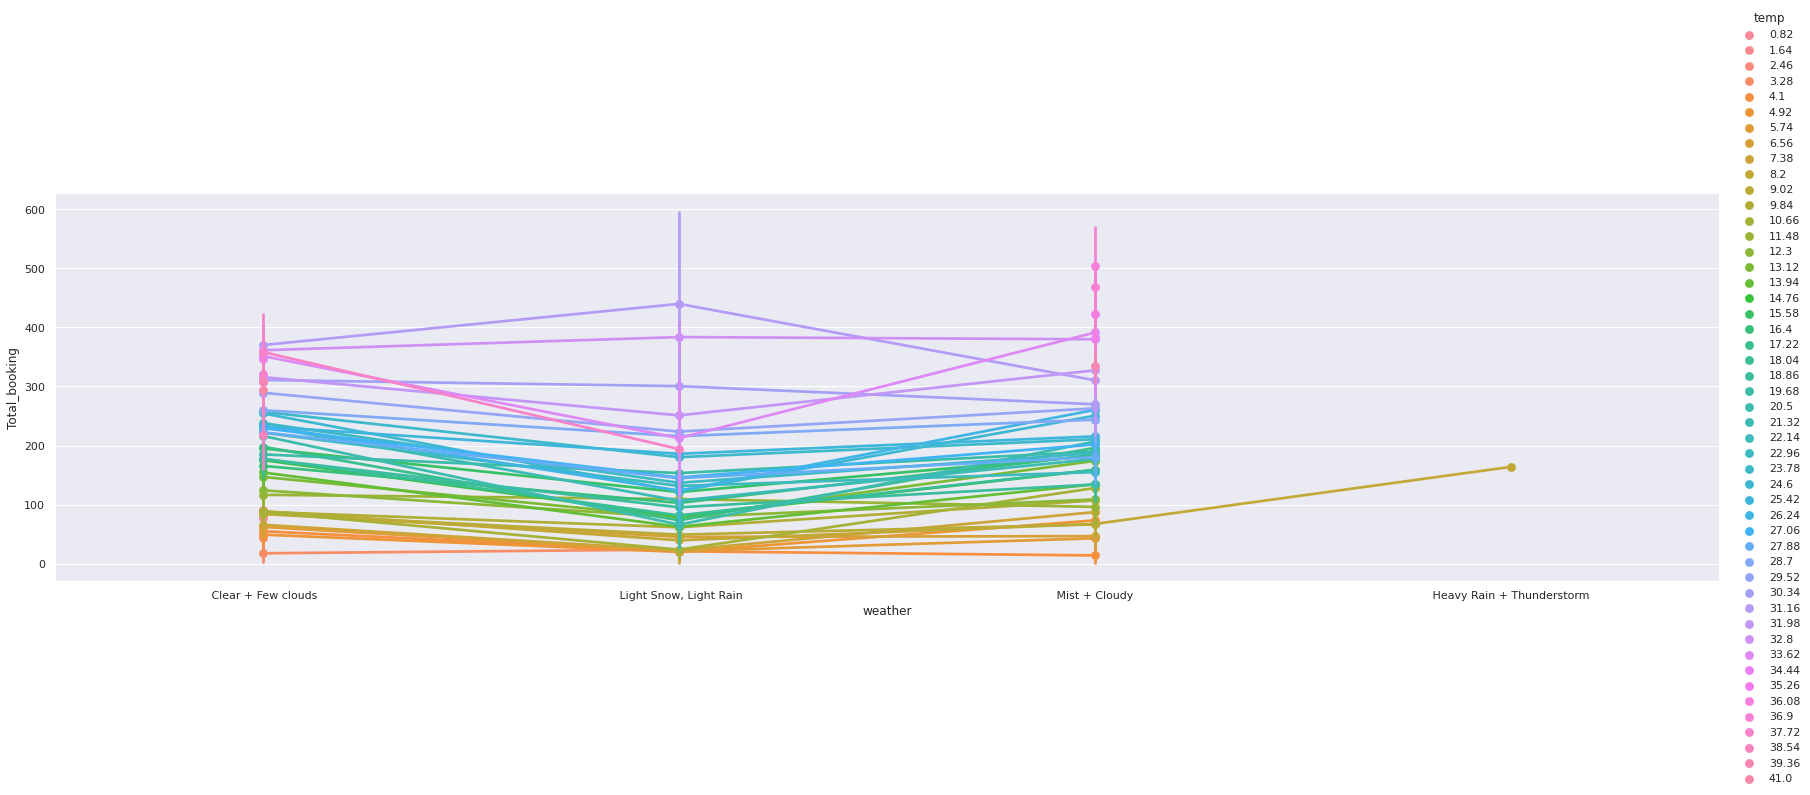

In [523]:
sns.factorplot("weather","Total_booking",data=data_append,hue="temp", size=6, aspect=4);

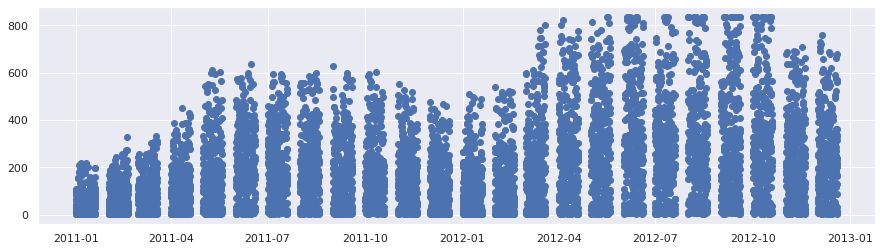

In [524]:

plt.figure(figsize=(15,4))
plt.scatter(data_append['date'],data_append['Total_booking'])
plt.show()

In [525]:
data_append_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,87.0,2012-05-10,11:00:00
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.0,2012-06-09,07:00:00
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.0,2011-03-06,20:00:00
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,668.0,2011-10-13,11:00:00
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.0,2012-06-02,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2012-03-08 03:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.0,2012-03-08,03:00:00
2174,2012-01-12 12:00:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.0,2012-01-12,12:00:00
2175,2012-03-07 22:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.0,2012-03-07,22:00:00
2176,2011-05-12 05:00:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.0,2011-05-12,05:00:00


In [564]:
train= data_append.append(data_append_test)

In [565]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504.0,2012-05-02,19:00:00
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5.0,2012-09-05,04:00:00
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139.0,2011-01-13,09:00:00
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209.0,2011-11-18,16:00:00
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184.0,2011-09-13,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2012-03-08 03:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.0,2012-03-08,03:00:00
2174,2012-01-12 12:00:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.0,2012-01-12,12:00:00
2175,2012-03-07 22:00:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.0,2012-03-07,22:00:00
2176,2011-05-12 05:00:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.0,2011-05-12,05:00:00


In [566]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10886 non-null  datetime64[ns]
 1   season         10886 non-null  object        
 2   holiday        10886 non-null  int64         
 3   workingday     10886 non-null  int64         
 4   weather        10886 non-null  object        
 5   temp           10886 non-null  float64       
 6   atemp          10886 non-null  float64       
 7   humidity       10886 non-null  int64         
 8   windspeed      10886 non-null  float64       
 9   Total_booking  10886 non-null  float64       
 10  date           10886 non-null  object        
 11  time           10886 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.1+ MB


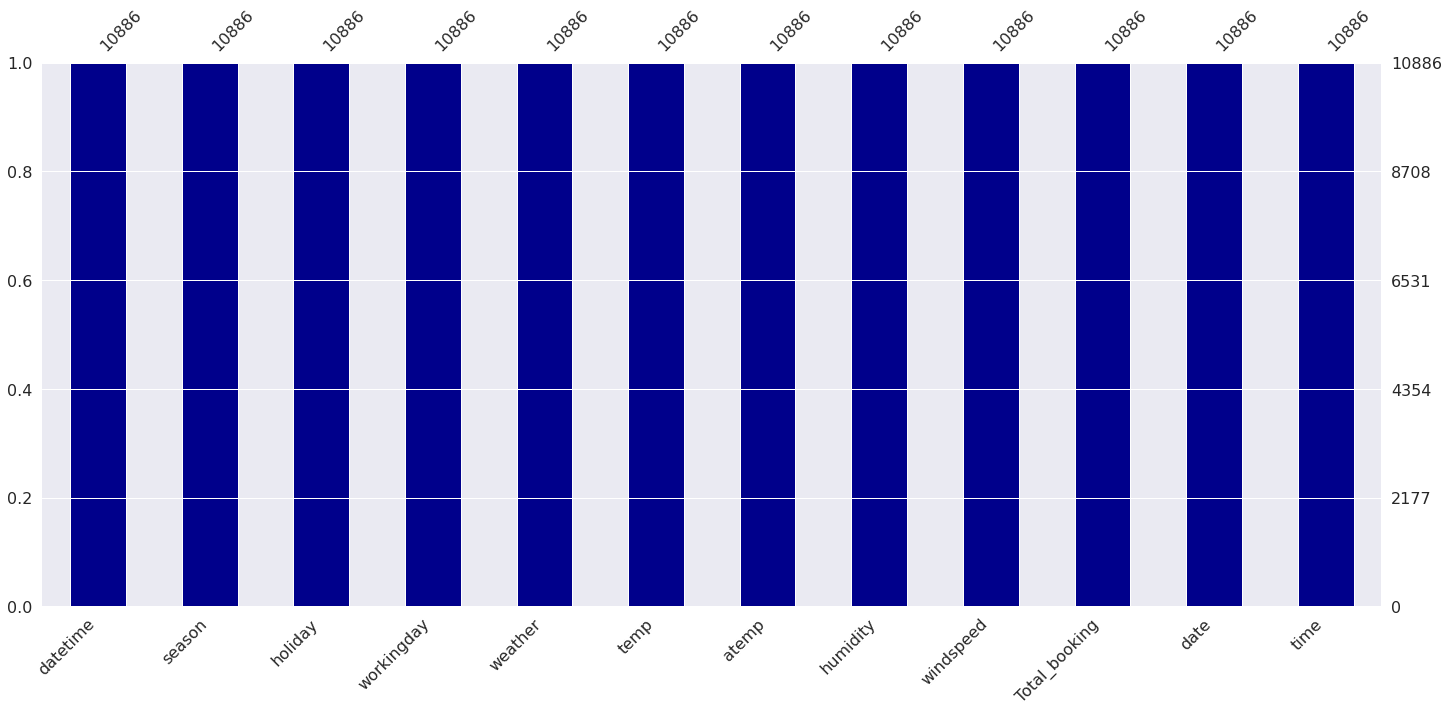

In [567]:
import missingno as msno
msno.bar(train, color='darkblue')

In [568]:
train['Total_booking'].value_counts()

5.0      169
4.0      149
3.0      144
6.0      135
2.0      132
        ... 
755.0      1
624.0      1
747.0      1
636.0      1
606.0      1
Name: Total_booking, Length: 787, dtype: int64

In [569]:
train['Total_booking'].fillna(0).value_counts()

5.0      169
4.0      149
3.0      144
6.0      135
2.0      132
        ... 
755.0      1
624.0      1
747.0      1
636.0      1
606.0      1
Name: Total_booking, Length: 787, dtype: int64

In [570]:
train.drop('datetime', axis=1, inplace=True)

In [571]:
from sklearn.preprocessing import LabelEncoder

df_lb = train.copy()
df_lb['season'].value_counts()

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64

In [572]:
lbl_enc = LabelEncoder()

# fit label encoder and transform values on ord_2 column
df_lb.loc[:, "season"] = lbl_enc.fit_transform(df_lb['season'].values)

df_lb['season'].value_counts()

3    2734
2    2733
0    2733
1    2686
Name: season, dtype: int64

In [573]:
df_lb1 = train.copy()
df_lb1['weather'].value_counts()

 Clear + Few clouds            7192
 Mist + Cloudy                 2834
 Light Snow, Light Rain         859
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

In [574]:
lbl_enc = LabelEncoder()

# fit label encoder and transform values on ord_2 column
df_lb1.loc[:, "weather"] = lbl_enc.fit_transform(df_lb1['weather'].values)

df_lb1['weather'].value_counts()

0    7192
3    2834
2     859
1       1
Name: weather, dtype: int64

In [575]:
df_lb2 = train.copy()
df_lb2['date'].value_counts()

2012-05-05    24
2012-11-12    24
2012-09-11    24
2012-11-18    24
2011-06-08    24
              ..
2011-01-12    22
2011-03-10    22
2011-02-11    22
2011-01-03    22
2011-01-18    12
Name: date, Length: 456, dtype: int64

In [576]:
lbl_enc = LabelEncoder()

# fit label encoder and transform values on ord_2 column
df_lb2.loc[:, "date"] = lbl_enc.fit_transform(df_lb2['date'].values)

df_lb2['date'].value_counts()

455    24
354    24
266    24
274    24
282    24
       ..
2      22
11     22
47     22
29     22
17     12
Name: date, Length: 456, dtype: int64

In [577]:
df_lb3 = train.copy()
df_lb3['time'].value_counts()

20:00:00    456
12:00:00    456
19:00:00    456
23:00:00    456
16:00:00    456
15:00:00    456
18:00:00    456
14:00:00    456
22:00:00    456
13:00:00    456
21:00:00    456
17:00:00    456
10:00:00    455
07:00:00    455
11:00:00    455
00:00:00    455
09:00:00    455
08:00:00    455
06:00:00    455
01:00:00    454
05:00:00    452
02:00:00    448
04:00:00    442
03:00:00    433
Name: time, dtype: int64

In [578]:
lbl_enc = LabelEncoder()

# fit label encoder and transform values on ord_2 column
df_lb3.loc[:, "time"] = lbl_enc.fit_transform(df_lb3['time'].values)

df_lb3['time'].value_counts()

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: time, dtype: int64

In [579]:
# Transforming Categorical features into numarical features
lb_en = LabelEncoder()
lb_en1 = LabelEncoder()
lb_en2 = LabelEncoder()
lb_en3 = LabelEncoder()
lb_en4 = LabelEncoder()
lb_en5 = LabelEncoder()
lb_en6 = LabelEncoder()
lb_en7 = LabelEncoder()
lb_en8 = LabelEncoder()
train.loc[:,'season'] = lb_en.fit_transform(train.loc[:,'season']) 
train.loc[:,'weather'] = lb_en1.fit_transform(train.loc[:,'weather']) 
train.loc[:,'temp'] = lb_en2.fit_transform(train.loc[:,'temp']) 
train.loc[:,'atemp'] = lb_en3.fit_transform(train.loc[:,'atemp']) 
train.loc[:,'humidity'] = lb_en4.fit_transform(train.loc[:,'humidity'])
train.loc[:,'windspeed'] = lb_en5.fit_transform(train.loc[:,'windspeed']) 
train.loc[:,'Total_booking'] = lb_en6.fit_transform(train.loc[:,'Total_booking']) 
train.loc[:,'date'] = lb_en7.fit_transform(train.loc[:,'date']) 
train.loc[:,'time'] = lb_en8.fit_transform(train.loc[:,'time']) 



In [580]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time
0,2,0,1,0,26,33,68,7,503,305,19
1,0,0,1,0,34,43,70,8,4,384,4
2,1,0,1,0,6,7,41,10,138,12,9
3,3,0,1,0,16,21,20,3,208,207,16
4,0,0,1,0,36,43,42,8,183,164,13


In [581]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2177
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   season         10886 non-null  int64
 1   holiday        10886 non-null  int64
 2   workingday     10886 non-null  int64
 3   weather        10886 non-null  int64
 4   temp           10886 non-null  int64
 5   atemp          10886 non-null  int64
 6   humidity       10886 non-null  int64
 7   windspeed      10886 non-null  int64
 8   Total_booking  10886 non-null  int64
 9   date           10886 non-null  int64
 10  time           10886 non-null  int64
dtypes: int64(11)
memory usage: 1020.6 KB


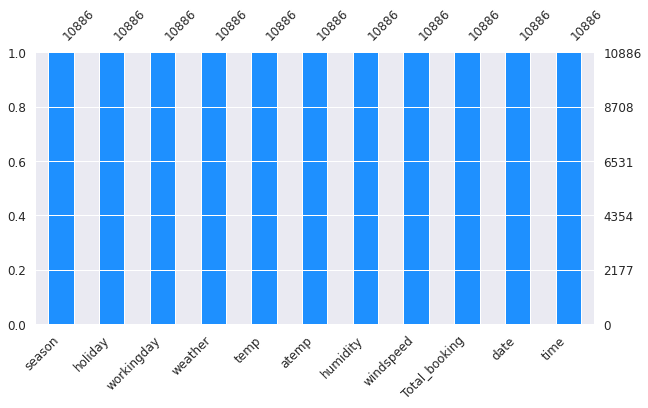

In [582]:
missingno.bar(train,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [583]:
test = train[10886:].drop('Total_booking',axis=1)
train = train[:10866]

In [584]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      0 non-null      int64
 1   holiday     0 non-null      int64
 2   workingday  0 non-null      int64
 3   weather     0 non-null      int64
 4   temp        0 non-null      int64
 5   atemp       0 non-null      int64
 6   humidity    0 non-null      int64
 7   windspeed   0 non-null      int64
 8   date        0 non-null      int64
 9   time        0 non-null      int64
dtypes: int64(10)
memory usage: 0.0 bytes


In [585]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 2157
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   season         10866 non-null  int64
 1   holiday        10866 non-null  int64
 2   workingday     10866 non-null  int64
 3   weather        10866 non-null  int64
 4   temp           10866 non-null  int64
 5   atemp          10866 non-null  int64
 6   humidity       10866 non-null  int64
 7   windspeed      10866 non-null  int64
 8   Total_booking  10866 non-null  int64
 9   date           10866 non-null  int64
 10  time           10866 non-null  int64
dtypes: int64(11)
memory usage: 1018.7 KB


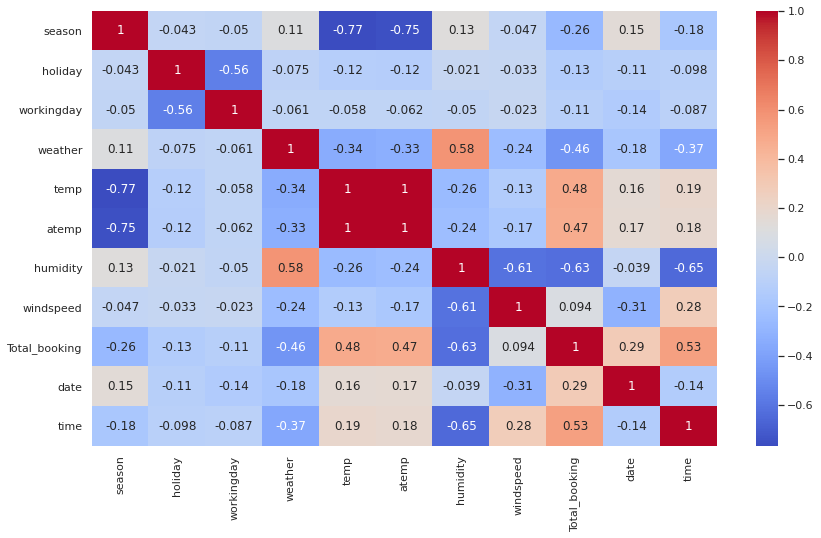

In [586]:
a= train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm')

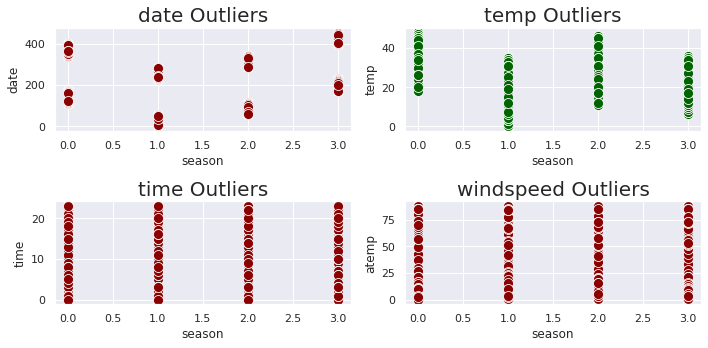

In [587]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
a = sns.scatterplot(x='season', y='date', data=train,ax=ax[0][0], color='darkred', s=100)
b = sns.scatterplot(x='season', y='temp', data=train,ax=ax[0][1], color='darkgreen', s=100)
c = sns.scatterplot(x='season', y='time', data=train,ax=ax[1][0], color='darkred', s=100)
d = sns.scatterplot(x='season', y='atemp', data=train,ax=ax[1][1], color='darkred', s=100)
e = sns.scatterplot(x='season', y='holiday', data=train,ax=ax[1][1], color='darkred', s=100)
f = sns.scatterplot(x='season', y='weather', data=train,ax=ax[1][1], color='darkred', s=100)
g = sns.scatterplot(x='season', y='humidity', data=train,ax=ax[1][1], color='darkred', s=100)
h = sns.scatterplot(x='season', y='windspeed', data=train,ax=ax[1][1], color='darkred', s=100)
a.set_title('date Outliers', fontsize=20)
b.set_title('temp Outliers', fontsize=20)
c.set_title('time Outliers', fontsize=20)
d.set_title('atemp Outliers', fontsize=20)
e.set_title('holiday Outliers', fontsize=20)
f.set_title('weather Outliers', fontsize=20)
g.set_title('humidity Outliers', fontsize=20)
h.set_title('windspeed Outliers', fontsize=20)


plt.tight_layout()

In [588]:
train['Total_booking'].value_counts()

4      169
3      149
2      143
5      135
1      132
      ... 
786      1
754      1
746      1
738      1
771      1
Name: Total_booking, Length: 787, dtype: int64

In [589]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'time'],
      dtype='object')

In [640]:
X = train.iloc[:,1:-1] # X value contains all the variables except labels
y = train.iloc[:,-1] # these are the labels

In [641]:
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date
0,0,1,0,26,33,68,7,503,305
1,0,1,0,34,43,70,8,4,384
2,0,1,0,6,7,41,10,138,12
3,0,1,0,16,21,20,3,208,207
4,0,1,0,36,43,42,8,183,164
...,...,...,...,...,...,...,...,...,...
2153,0,0,0,19,26,73,3,33,405
2154,0,0,0,12,17,51,3,151,49
2155,0,1,0,35,44,57,3,27,360
2156,0,0,3,17,22,53,3,35,202


In [642]:
y

0       19
1        4
2        9
3       16
4       13
        ..
2153    20
2154     0
2155     6
2156     3
2157     5
Name: time, Length: 10866, dtype: int64

In [643]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [644]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [645]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [646]:
y_train.value_counts()

22    329
6     328
0     327
11    326
19    325
18    325
23    324
20    322
14    321
5     321
10    320
2     319
15    316
17    315
8     314
16    314
9     313
1     313
13    312
12    309
21    308
4     307
7     304
3     294
Name: time, dtype: int64

In [647]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [648]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(),
    "MLPClassifier" : MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)
}

In [654]:
%%time
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.15260891590678824, 0.3699341438703141, 0.20263424518743667, 0.999113475177305, 0.999113475177305, 0.3290273556231003, 0.041666666666666664]
[0.1361111111111111, 0.11277777777777778, 0.15138888888888888, 0.16194444444444445, 0.1686111111111111, 0.18472222222222223, 0.041666666666666664]
CPU times: user 25.1 s, sys: 1.76 s, total: 26.9 s
Wall time: 25 s


In [655]:

print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.16      0.15      0.15       150
           1       0.21      0.25      0.22       150
           2       0.17      0.13      0.15       150
           3       0.24      0.31      0.27       150
           4       0.29      0.43      0.35       150
           5       0.25      0.29      0.27       150
           6       0.16      0.19      0.17       150
           7       0.19      0.19      0.19       150
           8       0.43      0.39      0.41       150
           9       0.18      0.36      0.24       150
          10       0.14      0.13      0.14       150
          11       0.09      0.05      0.07       150
          12       0.14      0.08      0.10       150
          13       0.07      0.05      0.05       150
          14       0.13      0.11      0.12       150
          15       0.11      0.09      0.10       150
          16       0.16      0.24      0.19       150
          17       0.23    

In [656]:
%%time
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

CPU times: user 8.08 s, sys: 20 ms, total: 8.1 s
Wall time: 8.12 s


In [657]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.16      0.15      0.15       150
           1       0.21      0.25      0.22       150
           2       0.17      0.13      0.15       150
           3       0.24      0.31      0.27       150
           4       0.29      0.43      0.35       150
           5       0.25      0.29      0.27       150
           6       0.16      0.19      0.17       150
           7       0.19      0.19      0.19       150
           8       0.43      0.39      0.41       150
           9       0.18      0.36      0.24       150
          10       0.14      0.13      0.14       150
          11       0.09      0.05      0.07       150
          12       0.14      0.08      0.10       150
          13       0.07      0.05      0.05       150
          14       0.13      0.11      0.12       150
          15       0.11      0.09      0.10       150
          16       0.16      0.24      0.19       150
          17       0.23    

In [658]:
%%time
lr=LogisticRegression()
model = lr.fit(X_balanced, y_balanced)
prediction = lr.predict(X_test_balanced)

CPU times: user 2.06 s, sys: 1.63 s, total: 3.69 s
Wall time: 1.89 s


In [659]:
%%time
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

[[ 4 13 18 28 33  5  9  5  3  0  5  1  0  0  7  2  0  1  0  0  1  2  0 13]
 [ 2 12 13 41 29  1 10  3  9  1  3  1  2  1  6  2  0  3  1  1  0  1  2  6]
 [ 1  5 12 59 37  2  4  5  6  0  5  0  0  0  8  0  1  0  0  0  1  1  2  1]
 [ 1 10 12 57 51  0  3  4 10  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  2 14 66 48  0  5  3  3  0  0  4  0  0  3  0  0  0  0  0  0  1  1  0]
 [ 1 10 17 41 60  1  3  4  7  0  1  0  0  0  1  1  0  1  1  0  0  0  1  0]
 [ 3  2  6 36 16  9 31 16  4  4  2  4  0  0  5  4  0  0  0  0  1  1  3  3]
 [ 0  1  1 27  5  1  9 20 41 10  1  1  3  2  3  0  3  6  0  7  4  2  2  1]
 [ 0  1  1 19  5  1  8  9 58  1  6  1  0  0  3  1  0 22  4  1  0  3  1  5]
 [ 4  1  2  3  0  3  2 24 13 16 10  3  7  6  5  9  5  4  5 10 12  3  2  1]
 [ 5  0  3  6  2  2 15 16  6  5  6 13  3  7 10 14  1  3  0  6  7  3 16  1]
 [ 7  1  4  0  3  2  5 13  5  4  1 11  4 10 11 16  4 18  6  4  8  7  4  2]
 [ 1  1  1  3  4  1  1  6  6  5  2 12  3 11 21 27  7 16  4  6  9  2  1  0]
 [ 2  1  2  3  1  1  1  4

In [660]:
%%time
su=SVC()
model = su.fit(X_balanced, y_balanced)
prediction = su.predict(X_test_balanced)

CPU times: user 5.93 s, sys: 2.98 ms, total: 5.94 s
Wall time: 5.95 s


In [661]:
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

[[19 14 10 21 17 26  1  5  1  2  2  0  0  2  1  2  0  1  2  0  0  7  4 13]
 [15 15 11 29 16 20  6  6  4  2  2  2  2  1  1  1  0  4  0  2  0  2  3  6]
 [10 25  4 38 24 18  2  4  1  0  4  2  0  0  2  1  0  0  0  3  1  2  3  6]
 [ 7 19 10 38 38 19  4  5  5  2  2  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 4 21  9 48 28 21  4  3  2  0  1  3  1  0  1  0  0  0  0  0  0  1  1  2]
 [ 7 17 13 40 35 20  1  1  6  2  1  2  0  0  1  0  0  0  0  0  0  0  1  3]
 [ 4  2  6 39  6 19 29  6  5  5  9  4  0  1  2  4  0  0  0  0  0  4  3  2]
 [ 0  3  2 32  3  1 10 36  5 15  1  2  4  2  1  0  4  0  0 11 10  4  3  1]
 [ 0  1  2 24  0  3  2 13 56  4  2  3  2  0  1  1  0 12  2  4  0  7  3  8]
 [ 1  4  0  7  0  4  7 17  0 26 13  6  3  3  2  5  4  3  1  5 16 12  7  4]
 [ 2  1  1  7  0  6 16  4  0  8 21 21  4  8  7 12  0  1  0  2  1  4 21  3]
 [ 3  1  0  3  1  3 10  3  4 10 14  7 14 19  7 12  2  4  5  3  7  9  8  1]
 [ 1  1  1  4  1  1  3  3  3  5 11 12  5 26 11 21  6  7  3  3 11  4  6  1]
 [ 3  0  1  2  0  3  2  0

In [662]:
rf=RandomForestClassifier()
model = rf.fit(X_balanced, y_balanced)
prediction = rf.predict(X_test_balanced)



In [663]:
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

[[29 24  5  4  3 28  3  2  5  2  2  2  0  1  0  0  0  0  2  2  3  2  9 22]
 [26 29 28  2  7 15  4  5 11  1  2  0  1  0  1  0  0  2  3  0  1  0  5  7]
 [10 50 12 24 18  5  2  6  6  2  1  0  0  0  0  0  0  0  1  2  1  1  4  5]
 [ 2 15 13 35 46  3 12  6  4  3  1  0  0  0  0  0  0  1  0  3  1  1  0  4]
 [ 3  3 21 39 34 26  7  5  2  0  3  0  0  0  0  0  0  0  0  1  0  0  2  4]
 [19 14  6  3 21 61 10  2  6  0  2  1  0  0  0  0  1  1  0  1  0  1  1  0]
 [ 1  2  1 14 11 13 37  9  5 10 10  3  1  1  2  3  0  0  0  1  0  4 12 10]
 [ 3  5  5 13  2  2  9 32  7 20  2  1  4  3  1  0  3  1  1 16 11  1  4  4]
 [11  6  5  4  1  3  5 12 61  6  1  1  1  1  0  0  0  2 10  5  3  4  3  5]
 [ 1  3  2  0  4  0  4 13 10 30 14  2  7  7  3  1  4  3  3  6  9 15  6  3]
 [ 1  2  0  0  2  0 11  6  2  5 23 36 11  2  8  2  1  1  3  5  3  7 17  2]
 [ 5  0  1  1  0  1  7  1  2  3 17  9 28 14 11  6  7  7  5  6  5  6  6  2]
 [ 1  4  4  2  0  1  1  4  1  9  5 19 12 27 14 11  6  3  8  4  4  7  2  1]
 [ 3  1  0  0  2  2  3  0

In [622]:
%%time
dt = DecisionTreeClassifier(random_state=0)
model = dt.fit(X_balanced, y_balanced)
prediction = dt.predict(X_test_balanced)

CPU times: user 72.3 ms, sys: 11 ms, total: 83.3 ms
Wall time: 85.9 ms


In [610]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [611]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [612]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [613]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [616]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [629]:
dt2 = DecisionTreeClassifier(random_state=0)
path = dt2.cost_complexity_pruning_path(X_balanced, y_balanced)
model = dt2.fit(X_balanced, y_balanced)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: user 18 ms, sys: 1.99 ms, total: 20 ms
Wall time: 21.8 ms


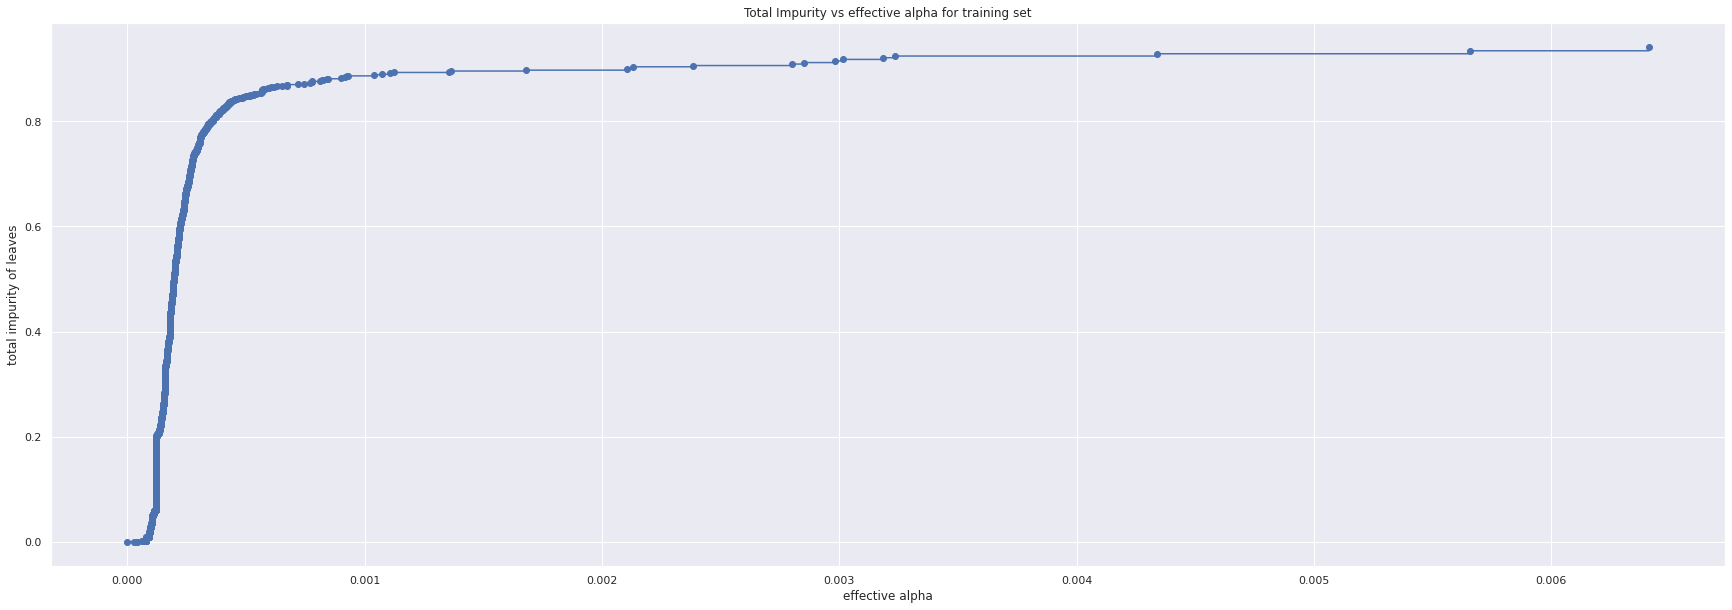

In [630]:
%%time
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [666]:
model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.15648035213197822
Residual sum of squares: 39.49


In [668]:
rfc=RandomForestClassifier(random_state=42)

In [669]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [670]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [671]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [672]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [674]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [675]:
pred=rfc1.predict(X_test)

In [676]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.19355828220858895


In [678]:
import xgboost as xgb
model = xgb.XGBRegressor()

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.1min finished


[00:59:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [680]:
print(np.sqrt(-model.best_score_))
print(model.best_params_)

5.504082406620877
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
